In [115]:
%matplotlib inline

In [116]:
# Create dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#load in csv
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [117]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [118]:
# Get the columns and rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [119]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [120]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [121]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [122]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")


18

In [123]:
# Get the number of data points from the Surburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [124]:
# Get all the null values for ride_data.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [125]:
#Check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [126]:
# Merge the two data frames into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the dataframe.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [127]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [128]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [129]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [130]:
# Get the number of rides for Urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [131]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [132]:
# Get the number of rides for Surburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [133]:
# Get the average fare of rides for Urban cities.
urban_ride_fares = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ride_fares.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [134]:
# Get the average fare of rides for rural cities/
rural_ride_fares = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_ride_fares.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [135]:
# Get the average fare of rides for suburban cities.
suburban_ride_fares = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_ride_fares.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [136]:
# Get the average number of drivers for urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [137]:
# Get the average number of drivers for rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [138]:
# Get the average number of drivers for suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

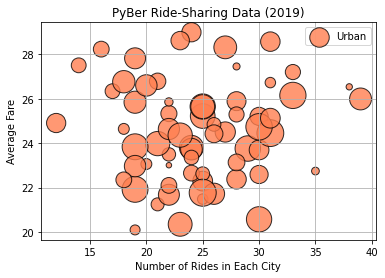

In [139]:
# Make a scatter plot for urban cities. The x-axis is the number of rides for each city. 
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

plt.scatter(urban_ride_count, urban_ride_fares, s= [i * 10 for i in urban_driver_count], alpha=.8, linewidths=1, color="coral", edgecolors="black", label="Urban")

plt.xlabel("Number of Rides in Each City")
plt.ylabel("Average Fare")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Add the legend
plt.legend()

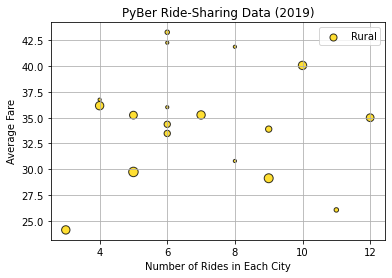

In [140]:
# Make a scatter plot for rural cities. The x-axis is the number of rides for each city. 
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

plt.scatter(rural_ride_count, rural_ride_fares, s= [i * 10 for i in rural_driver_count], alpha=.8, linewidths=1, color="gold", edgecolors="black", label="Rural")

plt.xlabel("Number of Rides in Each City")
plt.ylabel("Average Fare")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Add the legend
plt.legend()

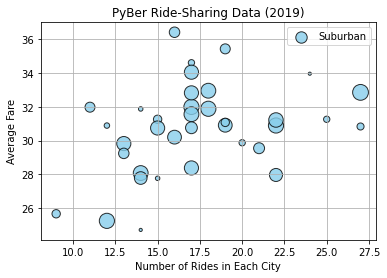

In [141]:
# Make a scatter plot for suburban cities. The x-axis is the number of rides for each city. 
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

plt.scatter(suburban_ride_count, suburban_ride_fares, s= [i * 10 for i in suburban_driver_count], alpha=.8, linewidths=1, color="skyblue", edgecolors="black", label="Suburban")

plt.xlabel("Number of Rides in Each City")
plt.ylabel("Average Fare")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Add the legend
plt.legend()

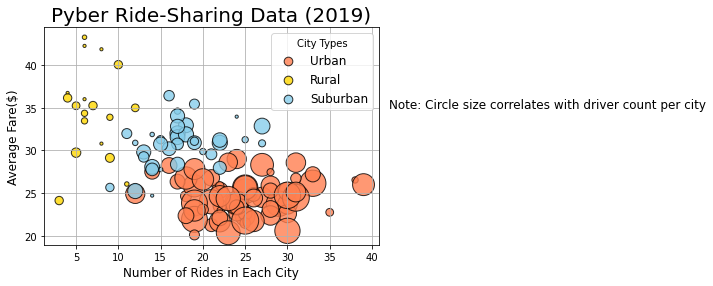

In [142]:
# Add the scatter charts to each type of city.

plt.scatter(urban_ride_count, urban_ride_fares, s= [i * 10 for i in urban_driver_count], alpha=.8, linewidths=1, color="coral", edgecolors="black", label="Urban")
plt.scatter(rural_ride_count, rural_ride_fares, s= [i * 10 for i in rural_driver_count], alpha=.8, linewidths=1, color="gold", edgecolors="black", label="Rural")
plt.scatter(suburban_ride_count, suburban_ride_fares, s= [i * 10 for i in suburban_driver_count], alpha=.8, linewidths=1, color="skyblue", edgecolors="black", label="Suburban")

# Incorporate the other graph properties.
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Number of Rides in Each City", fontsize=12)
plt.ylabel("Average Fare($)", fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend( fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.text(42, 35, "Note: Circle size correlates with driver count per city", fontsize=12)
# Save the figure.
plt.savefig("Resources/Fig1.png")
plt.show()